In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
df=pd.read_csv("c:\\Users\\souna\\Downloads\\CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [4]:
#feature columns with the data
X=np.array(df[['enginesize','horsepower']])
Y=np.array(df["price"])
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
#with preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X)
temp=scaler.fit_transform(X)


In [5]:
#train the model

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(X_train,Y_train)
print(regressor.intercept_)
print(regressor.coef_)

-8148.677422999768
[115.9909421  64.2026329]


In [6]:
y_pred=regressor.predict(X_test)
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np
mae=mean_absolute_error(Y_test, y_pred)
mse=mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
print('Mean Absolute Error:', mae)

print('Mean Squared Error:', mse)

print('Root Mean Squared Error:', rmse)



Mean Absolute Error: 3061.6172627779783
Mean Squared Error: 15514797.066791015
Root Mean Squared Error: 3938.882718080219


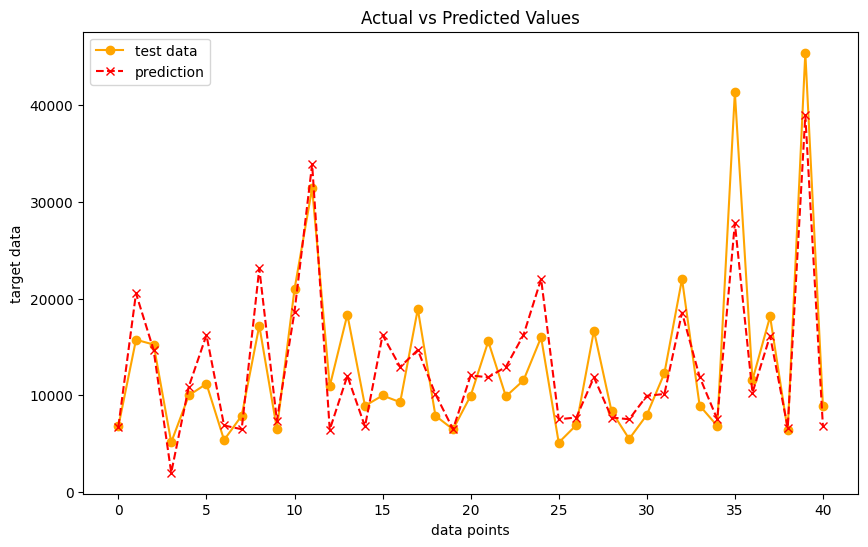

In [7]:
plt.figure(figsize=(10,6))
plt.plot( Y_test, label="test data",color="orange",marker='o')
plt.plot( y_pred, color='red', label="prediction", linestyle='--', marker='x')
plt.xlabel("data points")
plt.ylabel("target data")
plt.title('Actual vs Predicted Values')
plt.legend()
plt.savefig("fig.png",dpi=2000)



In [8]:
def cal(slope1,slope2 ,intercept,X1,X2):
    return slope1*X1 +slope2*X2+ intercept

slope1=regressor.coef_[0]
slope2=regressor.coef_[1]
intercept=regressor.intercept_

print('Equation of line: ', cal(slope1,slope2,intercept,49,39))

Equation of line:  38.7814230214035


In [9]:
y_pred = regressor.predict([[49,39]])
print("predicted line: ", y_pred)

predicted line:  [38.78142302]
